# Завдання
1. Створити функцію для читання зображення з диску та його вивід на екран
2. Створити функцію для збереження зображення на диску.
3. Створити функції для реалізації наступних піксельних операцій:
    - зміна контрастності (коеф. контрастності та яскравості)
    - зміна яскравості
    - зміна насиченості
    - зміна розміру
    - обрізання зображення
    - поворот зображення

## Рішення

In [550]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

### Функція для читання зображення з диску та його вивід на екран

In [551]:
def loading(file):
    img = cv2.imread(file)
    plt.axis('off')
    plt.imshow(img[..., ::-1])
    return img

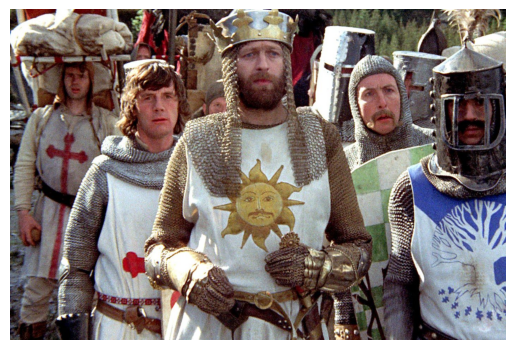

In [552]:
img = loading('monty_python.jpg')

### Функція для збереження зображення на диску

In [553]:
def writing(img, filename):
    cv2.imwrite(filename, img)
    print('Writing complete')

In [554]:
writing(img = img, filename='my.jpg')

Writing complete


### Зміна контрастності

In [555]:
def contrast_brightness(img, contrast_factor, brightness_factor):
    img = cv2.convertScaleAbs(img, alpha=contrast_factor, beta=brightness_factor)
    plt.axis('off')
    plt.imshow(img[..., ::-1])
    plt.show()
    return img

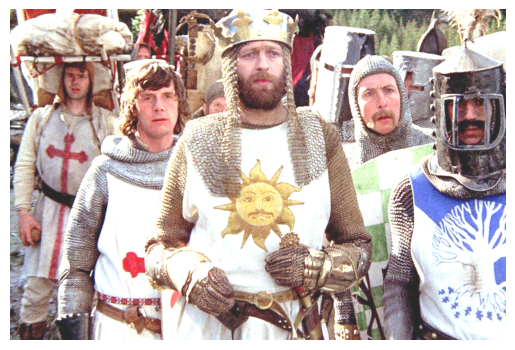

In [556]:
img_con_bright = contrast_brightness(img, 1.3, 40)

### Зміна яскравості

In [557]:
def brightness(img, value=30):
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    h, s, v = cv2.split(hsv)
    lim = 255 - value
    v[v > lim] = 255
    v[v <= lim] += value
    final_hsv = cv2.merge((h, s, v))
    img = cv2.cvtColor(final_hsv, cv2.COLOR_HSV2BGR)
    plt.axis('off')
    plt.imshow(img[..., ::-1])
    plt.show()
    return img

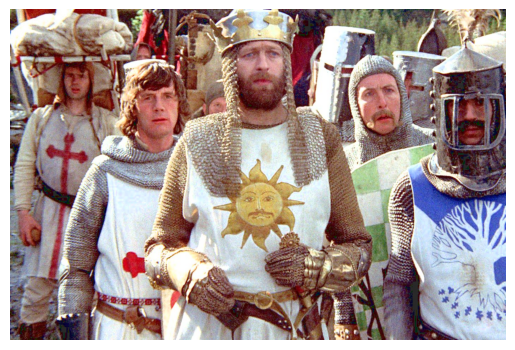

In [568]:
img_auto_contrast = brightness(img, value=40)

### Зміна насиченості

In [559]:
def saturation(img, saturation_factor):
    hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    hsv_img[:,:,1] = hsv_img[:,:,1]*saturation_factor
    img = cv2.cvtColor(hsv_img, cv2.COLOR_HSV2BGR)
    plt.axis('off')
    plt.imshow(img[..., ::-1])
    plt.show()
    return img

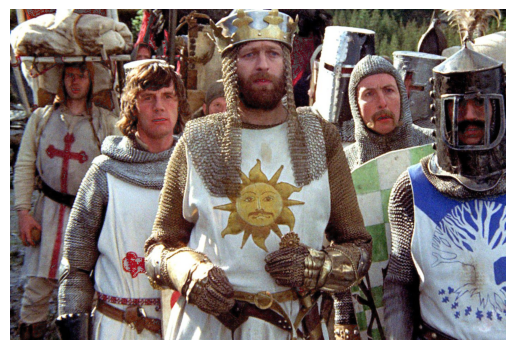

In [570]:
img_sat = saturation(img, 1.1)

### Зміна розміру

In [561]:
def resize(img, scale):
    height, width = img.shape[:2]
    print('Розмір оригінального зображення', width, 'x', height)
    new_width, new_height = int(width * scale), int(height * scale)
    print('Розмір зображення після перетворення', new_width, 'x', new_height)
    return cv2.resize(img, (new_width, new_height), interpolation=cv2.INTER_AREA)

Розмір оригінального зображення 1400 x 933
Розмір зображення після перетворення 700 x 466


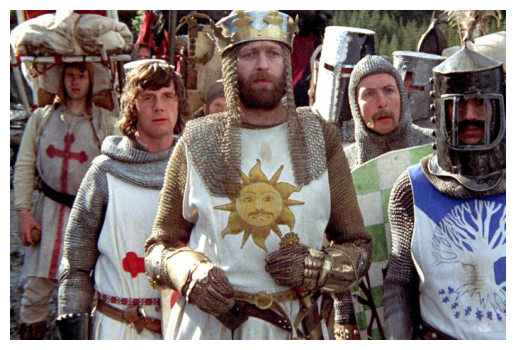

In [562]:
img_resize = resize(img, 0.5)
plt.axis('off')
plt.imshow(img_resize[..., ::-1])
plt.show()

### Обрізання зображення

In [563]:
def cropped(img, x1, y1, x2, y2):
    cropped_img = img[x1:x2, y1:y2]
    return cropped_img

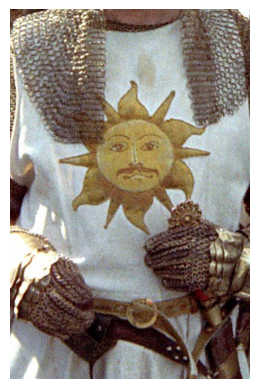

In [564]:
img_crop = cropped(img, 300, 490, 1000, 900)
plt.axis('off')
plt.imshow(img_crop[..., ::-1])
plt.show()

### Поворот зображення

In [565]:
def rotation(img, angl):
    size = img.shape
    center = (size[1] // 2, size[0] // 2)
    new_img=cv2.getRotationMatrix2D(center, angl, 1.0)
    rotated = cv2.warpAffine(img, new_img, (size[1], size[0]))
    return rotated

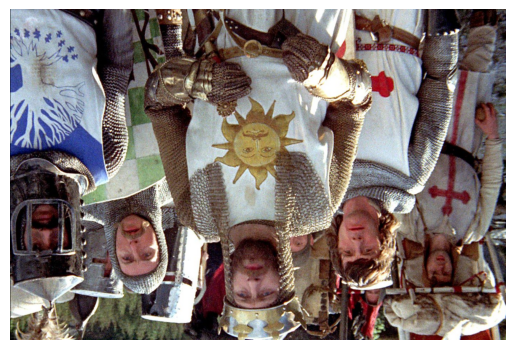

In [566]:
img_rotation = rotation(img, 180)
plt.axis('off')
plt.imshow(img_rotation[..., ::-1])
plt.show()